In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'figure.autolayout': True})

import warnings
warnings.filterwarnings("ignore")

In [2]:
subway = pd.read_csv('ttc_subway_srt.csv')
weather = pd.read_csv('weather.csv')
holidays = pd.read_csv('holidays.csv')
locations = pd.read_csv('subway_location.csv')

In [3]:
subway.sample(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Year,Description
94647,2018-08-12,11:55,Friday,BLOOR DANFORTH SUBWAY,MUGD,0,0,NaN,BD,0,2018,Miscellaneous General Delays
102402,2018-12-24,18:30,Saturday,WILSON STATION,SUDP,0,0,N,YU,6101,2018,Disorderly Patron
52708,2016-07-14,14:09,Tuesday,LANSDOWNE STATION,SUDP,7,10,W,BD,5152,2016,Disorderly Patron
45387,2016-03-07,13:41,Saturday,GREENWOOD STATION,TUS,5,8,E,BD,5042,2016,Crew Unable to Maintain Schedule
12854,2014-08-18,22:30,Saturday,BLOOR DANFORTH SUBWAY,MUGD,0,0,NaN,BD,0,2014,Miscellaneous General Delays


In [4]:
weather.sample(5)

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
586,2015-08-10,2015,8,10,23.30,14.24,18.80,24.64,0.00,29.56,0.0
997,2016-09-24,2016,9,24,18.90,8.64,13.80,0.00,0.00,0.00,0.0
2183,2019-12-24,2019,12,24,NaN,NaN,NaN,0.00,0.00,0.00,0.0
824,2016-04-04,2016,4,4,-1.42,-6.66,-4.06,0.00,1.16,5.80,7.4
1924,2019-04-09,2019,4,9,10.54,3.28,6.92,0.00,0.00,0.00,0.0


In [5]:
holidays.sample(5)

,date,holiday
57,2015-12-31,Additional Day
122,2020-12-28,Boxing Day
13,2012-12-31,Additional Day
18,2013-07-01,Canada Day
45,2015-02-16,Family Day


In [7]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109340 entries, 0 to 109339
Data columns (total 16 columns):
Unnamed: 0          109340 non-null int64
Unnamed: 0.1        109340 non-null int64
Date                109340 non-null object
Time                109340 non-null object
Day                 109340 non-null object
Station             109340 non-null object
Code                109217 non-null object
Min Delay           109340 non-null int64
Min Gap             109340 non-null int64
Bound               85646 non-null object
Line                108901 non-null object
Vehicle             109340 non-null int64
Year                109340 non-null int64
Description         106794 non-null object
subway_latitude     80026 non-null float64
subway_longitude    80026 non-null float64
dtypes: float64(2), int64(6), object(8)
memory usage: 13.3+ MB


In [8]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109326 entries, 0 to 109325
Data columns (total 12 columns):
Date           109326 non-null object
Time           109326 non-null object
Day            109326 non-null object
Station        109326 non-null object
Code           109203 non-null object
Min Delay      109326 non-null int64
Min Gap        109326 non-null int64
Bound          85638 non-null object
Line           108889 non-null object
Vehicle        109326 non-null int64
Year           109326 non-null int64
Description    106780 non-null object
dtypes: int64(4), object(8)
memory usage: 10.0+ MB


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 11 columns):
Date/Time            2191 non-null object
Year                 2191 non-null int64
Month                2191 non-null int64
Day                  2191 non-null int64
Max Temp (°C)        1809 non-null float64
Min Temp (°C)        1828 non-null float64
Mean Temp (°C)       1795 non-null float64
Total Rain (mm)      2191 non-null float64
Total Snow (cm)      2191 non-null float64
Total Precip (mm)    2191 non-null float64
Snow on Grnd (cm)    2191 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 188.4+ KB


In [10]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
date       123 non-null object
holiday    123 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [11]:
subway['Date'] = pd.to_datetime(subway['Date'])
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
holidays['date'] = pd.to_datetime(holidays['date'])

weather = weather.rename(columns={
    'Date/Time': 'Date', 
    'Mean Temp (°C)': 'Mean Temp', 
    'Total Precip (mm)': 'Precipitation'
})

holidays = holidays.rename(columns={
    'date': 'Date'
})

subway['Month'] = subway['Date'].dt.month
subway['nDay'] = subway['Date'].dt.day



In [12]:
locations = locations.groupby('Station').agg({
    'subway_latitude': 'mean', 
    'subway_longitude': 'mean',
    'Min Delay': 'sum'
})

locations = locations[locations['subway_latitude'] > 0]

locations.head()

,subway_latitude,subway_longitude,Min Delay
Station,,,
BATHURST STATION,43.665992,-79.411583,1813
BAY STATION,43.670400,-79.390270,1809
BAYVIEW STATION,43.767252,-79.387399,1443
BESSARION STATION,43.769127,-79.376724,804
BLOOR STATION,43.670672,-79.385950,5013


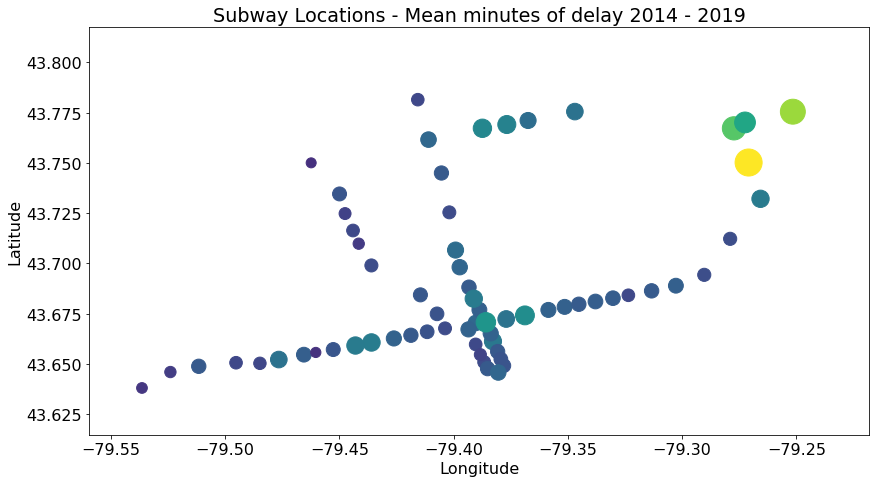

In [37]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    locations['subway_longitude'], 
    locations['subway_latitude'], 
    c = locations['Min Delay'], 
    s = locations['Min Delay']*100
)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Subway Locations - Mean minutes of delay 2014 - 2019')

plt.tight_layout()

plt.savefig('Subway Locations - Mean minutes of delay 2014 - 2019')
plt.show()

In [ ]:
subway.sample(5)

In [ ]:
weather.sample(5)

In [13]:
weather = weather.drop(columns=['Year', 'Month', 'Day'])

subway = pd.merge(subway, weather, on='Date', how='left')
subway = pd.merge(subway, holidays, on='Date', how='left')

In [14]:
subway.sample(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Month,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),holiday
2382,2014-02-12,7:59,Monday,WILSON STATION,EUSC,3,6,S,YU,5269,...,2,12,-6.04,-19.54,-12.82,0.00,0.0,0.00,22.2,NaN
35938,2015-09-22,18:23,Sunday,BLOOR STATION,SUO,5,10,N,YU,5431,...,9,22,22.30,10.32,16.34,0.00,0.0,0.00,0.0,NaN
7663,2014-05-12,10:19,Saturday,YORK MILLS STATION,TUSC,0,0,N,YU,5776,...,5,12,21.34,11.24,16.32,1.48,0.0,1.56,0.0,NaN
93828,2018-07-30,10:38,Saturday,LAWRENCE WEST STATION,TUSC,0,0,S,YU,5386,...,7,30,25.70,16.02,20.88,0.64,0.0,0.64,0.0,NaN
38794,2015-11-09,18:08,Saturday,CASTLE FRANK STATION,MUPLB,18,22,E,BD,5300,...,11,9,11.50,-0.14,5.72,0.00,0.0,0.00,0.0,NaN


In [15]:
subway['holiday'] = subway['holiday'].fillna('None')

In [16]:
holidays = round(subway.groupby('holiday').agg({'Min Delay': 'mean'}), 2)
holidays

,Min Delay
holiday,
Additional Day,1.92
Boxing Day,1.98
Canada Day,2.09
Christmas,1.47
Christmas Day,2.75
Civic Holiday,1.37
Family Day,2.07
Good Friday,1.53
Labour Day,1.33


<center><h2>Exploratory Scatterplots</center></h2>

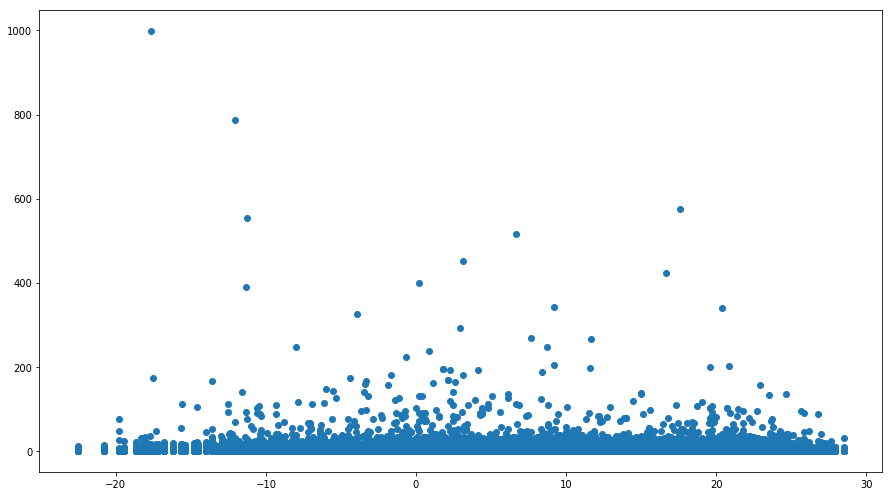

In [17]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(subway['Mean Temp'], subway['Min Delay'])

plt.show()

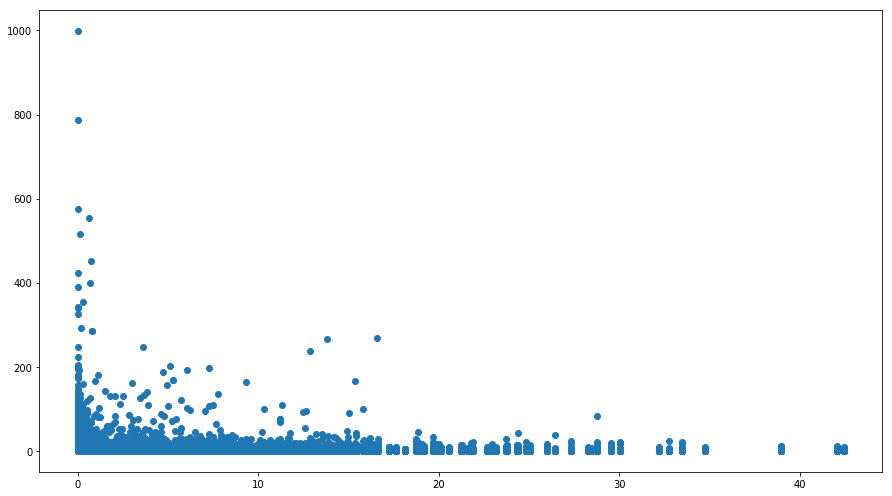

In [18]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(subway['Precipitation'], subway['Min Delay'])

plt.show()

<center><h2>Delay Time</h2></center>

In [19]:
groupedbyday = subway.groupby(['Date', 'Day']).agg({'Min Delay': 'sum', 'Precipitation': 'sum'})
groupedbyday = groupedbyday.reset_index()
#groupedbyday['Precipitation'] = groupedbyday['Precipitation'] / 100 # Convert to cm

In [20]:
groupedbyday.sort_values('Date').head(15)

,Date,Day,Min Delay,Precipitation
0,2014-01-03,Wednesday,203,1.80
1,2014-01-04,Thursday,159,72.96
2,2014-01-05,Friday,157,723.52
3,2014-01-06,Saturday,68,154.44
4,2014-01-07,Sunday,87,2.72
5,2014-01-08,Monday,96,2.44
6,2014-01-09,Tuesday,166,33.80
7,2014-01-10,Wednesday,194,313.04
8,2014-01-11,Thursday,331,751.52
9,2014-01-12,Friday,102,0.00


In [21]:
totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

In [22]:
delaystats

,Total Days,Total Minutes,Days Delayed,Mean Min. per Day,Median Min. per Day,% of Days Delayed,Daily Sigma,Delay Variance
Stats,1946,216403,150.28,111.2,97,8.00%,74.96,5619


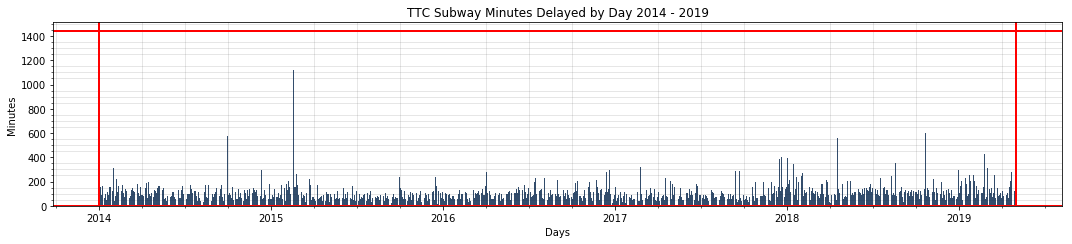

In [23]:
x = groupedbyday['Date']
y = groupedbyday['Min Delay']

fig, ax = plt.subplots(1, figsize = [15, 3.5])

ax.bar(
    x,
    y, 
    color = '#002147', 
    alpha = .8
)

ax.axhline(
    y = 1440, 
    color = 'red',
    lw = 2
)

ax.axhline(
    y = 0, 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[0, 0], 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[1945, 0], 
    color = 'red', 
    lw = 2
)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days')
ax.set_title('TTC Subway Minutes Delayed by Day 2014 - 2019')

plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('TTC_Subway_Mintues_Delayed_2014_2019.png')
plt.show()

Each x marker bar is representative of 1 day for a total of 1946 days. 1440 minutes are available in each day, so think of the space within the interior of the red box as time, with the dark blue bars of each delay as the amount of space in time the delays took.

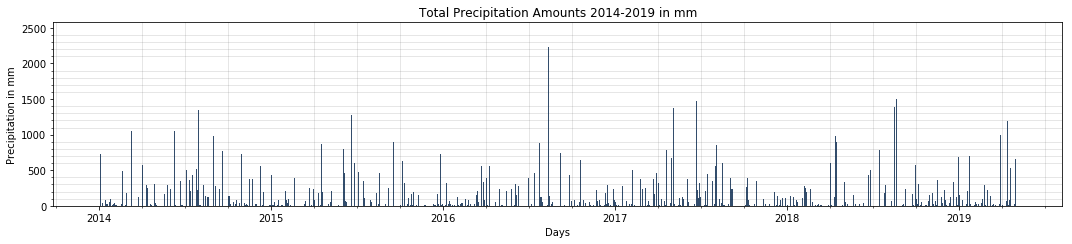

In [24]:
x = groupedbyday['Date']
y = groupedbyday['Precipitation']

fig, ax = plt.subplots(1, figsize = [15, 3.5])

ax.bar(
    x,
    y, 
    color = '#002147', 
    alpha = .8
)

ax.set_ylabel('Precipitation in mm')
ax.set_xlabel('Days')
ax.set_title('Total Precipitation Amounts 2014-2019 in mm')

plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('Total Precipitation Amounts 2014-2019.png')
plt.show()

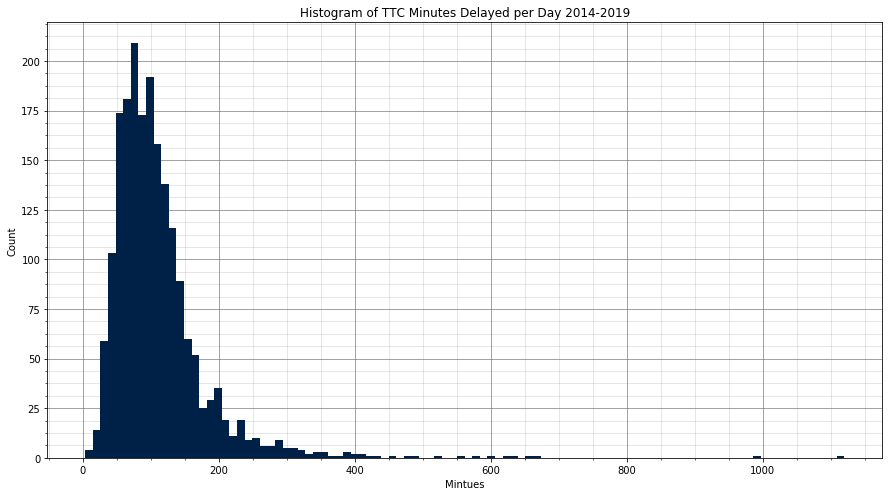

In [25]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#002147'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of TTC Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.show()

<center><h2>Incidents</h2></center>

In [27]:
value_counts = pd.DataFrame(subway['Description'].value_counts()).reset_index().rename(
    columns={'Description': '# of Incidents', 'index': 'Description'})

In [30]:
value_counts.to_csv('subway_description_value_counts.csv')

In [ ]:
groupedmindelay = subway.groupby('Description').agg({
    'Min Delay': 'sum'
}).reset_index().rename(
    columns={'Min Delay': 'Minutes'
            })

groupedmindelay.head(10)

In [ ]:
delays = pd.merge(value_counts, groupedmindelay, on='Description', how='left')
delays['Min per Incident'] = round(delays['Minutes'] / delays['# of Incidents'], 3)

In [ ]:
delays.head(10)

In [ ]:
x = delays[delays['# of Incidents'] < 2000]
x = x[x['Minutes'] < 2000]
x = x.sort_values('Minutes').head(25)

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    x['# of Incidents'], 
    x['Minutes'],
    c = x['Min per Incident'],
    alpha = .5,
    s = 150
)

ax.set_xlabel('# of Incidents')
ax.set_ylabel('Minutes')
ax.set_title('Exploring Incidents and Time')

plt.show()

In [ ]:
x

In [ ]:
list(x.columns)

In [ ]:
bar1 = x['# of Incidents']
bar2 = x['Minutes']
bar3 = x['Min per Incident']

label = x['Description']
barwidth = 1
names = list(x.columns)

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

ax.bar(label, bar1, color='#002147', edgecolor='white', width=barwidth)
ax.bar(label, bar2, bottom=bar1, color='#5F90B2', edgecolor='white', width=barwidth)
ax.bar(label, bar3, bottom=bars, color='#848482', edgecolor='white', width=barwidth)

plt.xticks(label, names, fontweight='bold')
ax.set_xlabel('Description')

plt.show()

<center><h2>Stations</center></h2>

In [ ]:
stations = subway.groupby('Station').agg({
    'Min Delay': 'sum', 
}).rename(
    columns={
        'Min Delay': 'Sum', 
    })

stations = round(stations[stations['Sum'] > 0], 2)

In [ ]:
stations = stations.dropna().reset_index()
len(stations)

In [ ]:
fig, ax = plt.subplots()

ax.barh(stations['Station'], stations['Sum'])

In [ ]:
stations.sort_values('Sum', ascending = False).head()

<center><h2>Days of the Week</center></h2>

In [ ]:
subway.sample(5)

In [ ]:
weekdays = subway.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum'
}).reset_index()
weekdays

In [ ]:
names

In [ ]:
bar1 = weekdays['Min Delay']
bar2 = weekdays['Min Gap']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Sum of Minutes per Day of the Week')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()

plt.savefig('Sum of Minutes per Day of the Week.png')
plt.show()

In [ ]:
bar1 = x['# of Incidents']
bar2 = x['Minutes']
bar3 = x['Min per Incident']

label = x['Description']
barwidth = 1
names = list(x.columns)

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

ax.bar(label, bar1, color='#002147', edgecolor='white', width=barwidth)
ax.bar(label, bar2, bottom=bar1, color='#5F90B2', edgecolor='white', width=barwidth)
ax.bar(label, bar3, bottom=bars, color='#848482', edgecolor='white', width=barwidth)

plt.xticks(label, names, fontweight='bold')
ax.set_xlabel('Description')

plt.show()

<center><h2>By Line</h2></center>

In [8]:
subway.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Month,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),holiday
0,2014-01-03,0:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,1,3,-7.62,-23.64,-15.64,0.0,0.0,0.04,7.6,None
1,2014-01-03,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,1,3,-7.62,-23.64,-15.64,0.0,0.0,0.04,7.6,None
2,2014-01-03,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,...,1,3,-7.62,-23.64,-15.64,0.0,0.0,0.04,7.6,None
3,2014-01-03,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,...,1,3,-7.62,-23.64,-15.64,0.0,0.0,0.04,7.6,None
4,2014-01-03,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,...,1,3,-7.62,-23.64,-15.64,0.0,0.0,0.04,7.6,None


In [13]:
line = subway.groupby(['Day', 'Line']).agg({'Min Delay': 'sum'})
line = line[line['Min Delay'] > 0]

In [14]:
line

Min Delay
Day       Line                   
Friday    BD                14506
          SHP                1170
          SRT                3265
          YU                14649
Monday    BD                13670
          SHP                1518
          SRT                2404
          YU                15090
Saturday  B/D                   9
          BD                10847
          SHP                1122
          SRT                3523
          YU                11749
          YU/BD                 3
Sunday    B/D                  10
          BD                 9132
          SHP                1524
          SRT                2638
          YU                 8995
Thursday  66                   12
          B/D                   7
          BD                13512
          SHP                1489
          SRT                3117
          YU                13995
Tuesday   BD                14749
          SHP                1171
          SRT                4652
          YU                14660
Wednesday 25 DON MILLS          3
          B/D                   7
          BD                14010
          SHP                1307
          SRT                4052
          YU                13816